### Edgar Moises Hernandez-Gonzalez
#### 01/04/20-03/04/20
#### Clasificacion de CIFAR10 con Fine Tunning con data augmentation usando VGG16
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 72.54%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
# las etiquetas en categorical para poder entrenar data augmentation
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [0]:
datagen_train = ImageDataGenerator(
	rotation_range=20, #10
	width_shift_range=0.2, #0.1
	height_shift_range=0.2, #0.1
	zoom_range=0.2, #0.15
	shear_range=0.2, #0.15
	horizontal_flip=True,
	fill_mode='nearest')

In [0]:
base_model = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=x_train.shape[1:])

In [10]:
for layer in base_model.layers[:-4]:
  layer.trainable = False

for layer in base_model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f8063bb7cf8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7fdb30e240> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7fdb30ea58> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7fdb2cfc50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7fdb2cfac8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7fd04a6e48> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7fd04b04a8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7fd04b9dd8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7fd04b9fd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7fd04c6358> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7fd04c6748> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [0]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

optimizer = Adam(lr=1e-6)
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 7,112,906
Non-trainable params: 7,635,264
_________________________________________________________________


In [13]:
history = model.fit_generator(datagen_train.flow(x_train, y_train_categorical, batch_size=128),
                              steps_per_epoch=np.ceil(n_samples_train/128),
                              epochs=200,
                              validation_data=(x_test, y_test_categorical),
                              verbose=2)
# no se usa porque validation_data no es un generador
#validation_steps=np.ceil(n_samples_test/128)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
391/391 - 31s - loss: 2.3233 - accuracy: 0.1368 - val_loss: 2.1459 - val_accuracy: 0.2584
Epoch 2/200
391/391 - 30s - loss: 2.0913 - accuracy: 0.2502 - val_loss: 1.9032 - val_accuracy: 0.3674
Epoch 3/200
391/391 - 30s - loss: 1.9101 - accuracy: 0.3209 - val_loss: 1.7197 - val_accuracy: 0.4351
Epoch 4/200
391/391 - 30s - loss: 1.7880 - accuracy: 0.3683 - val_loss: 1.5879 - val_accuracy: 0.4797
Epoch 5/200
391/391 - 30s - loss: 1.7045 - accuracy: 0.3997 - val_loss: 1.4981 - val_accuracy: 0.5058
Epoch 6/200
391/391 - 30s - loss: 1.6455 - accuracy: 0.4237 - val_loss: 1.4348 - val_accuracy: 0.5254
Epoch 7/200
391/391 - 30s - loss: 1.5981 - accuracy: 0.4430 - val_loss: 1.3859 - val_accuracy: 0.5411
Epoch 8/200
391/391 - 30s - loss: 1.5579 - accuracy: 0.4570 - val_loss: 1.3450 - val_accuracy: 0.5533
Epoch 9/200
391/391 - 30s - loss: 1.5237 - accuracy: 0.4693 - val_loss: 1.3097 - val_accuracy: 0.5645
Epoch 

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 0.8124 - accuracy: 0.7197
Test loss: 0.8123921751976013
Test accuracy: 0.7196999788284302


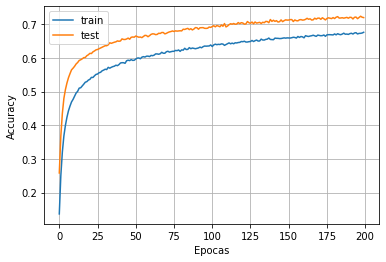

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

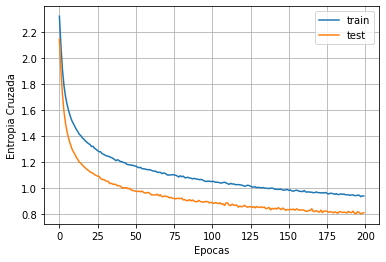

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [18]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[776  37  31  11   8   3  15  18  59  42]
 [  9 854   1   7   0   2  12   4   8 103]
 [ 37  16 590  35  71  41 156  27   7  20]
 [ 14  27  39 481  29 130 181  37  24  38]
 [ 23  10  44  26 577  27 188  83   9  13]
 [ 13  12  31 145  31 593  90  61   3  21]
 [  5   9  22  21  14  25 880   6   7  11]
 [  7   6  18  26  38  42  28 809   2  24]
 [ 57  59  10   8   7   3   6   3 798  49]
 [  9 100   1   5   0   2  18  11  15 839]]


In [19]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1000
           1       0.76      0.85      0.80      1000
           2       0.75      0.59      0.66      1000
           3       0.63      0.48      0.55      1000
           4       0.74      0.58      0.65      1000
           5       0.68      0.59      0.63      1000
           6       0.56      0.88      0.68      1000
           7       0.76      0.81      0.79      1000
           8       0.86      0.80      0.83      1000
           9       0.72      0.84      0.78      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000

